In [1]:
# importing libraries and the data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**General dataset**

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21613, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
(df.isna().sum())/len(df)*100 # check if there is any missing values

id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64

In [6]:
print("Numbers of duplicated records: ", df.duplicated().sum()) #check if there is any duplicated records

Numbers of duplicated records:  0


**Distribution of the target (price) and outlier detection**

In [7]:
df['price'].describe()
# 25% percentile of the data are below $321K priced houses
# 50% percentile of the data are below $450K priced houses
# 75% percentile of the data are below $645K priced houses

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

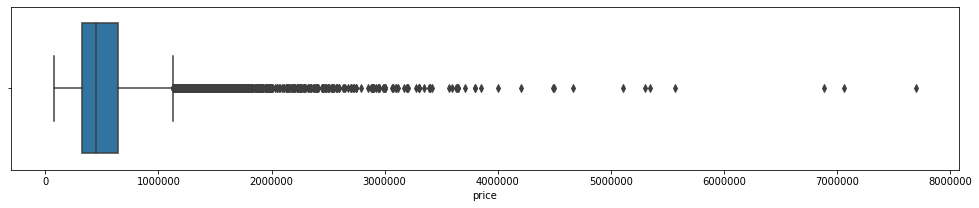

In [8]:
fig, ax = plt.subplots(figsize=(17,3))
sns.boxplot(x = 'price', data=df)
plt.ticklabel_format(style='plain', axis='x')

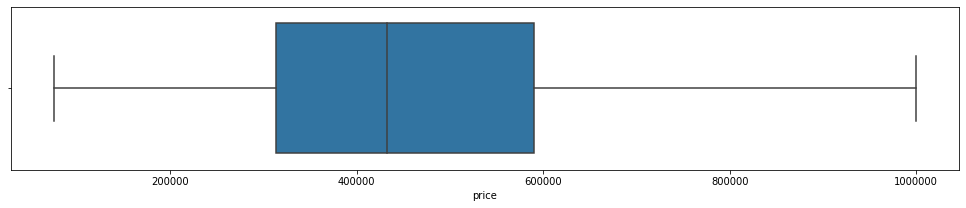

In [9]:
df = df[(df['price']<1000000) & (df['bedrooms']<=6)]
fig, ax = plt.subplots(figsize=(17,3))
sns.boxplot(x='price', data=df)
plt.ticklabel_format(style='plain', axis='x')

In [10]:
# The house price ranges between $78,000 - < $1 million

**Data Exploration and Cleaning**

In [11]:
# Summary of numerical variables
numerical_vars = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'sqft_above', 'sqft_basement','lat', 'long', 'sqft_living15', 'sqft_lot15']
df[numerical_vars].describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,20074.000000,20074.000000,20074.000000,2.007400e+04,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000,20074.000000
mean,3.308309,2.034497,1950.654628,1.452141e+04,1.470609,1689.339046,261.315582,47.555628,-122.213056,1907.451729,12394.039902
std,0.861935,0.698208,751.663119,4.004265e+04,0.536454,709.220352,402.235425,0.141801,0.142653,600.594840,26482.842030
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,290.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.500000,1390.000000,5.000000e+03,1.000000,1170.000000,0.000000,47.457100,-122.330000,1460.000000,5046.000000
50%,3.000000,2.000000,1840.000000,7.500000e+03,1.000000,1500.000000,0.000000,47.565400,-122.232000,1790.000000,7529.000000
75%,4.000000,2.500000,2400.000000,1.025000e+04,2.000000,2080.000000,500.000000,47.680100,-122.122000,2260.000000,9833.500000
max,6.000000,6.000000,7120.000000,1.651359e+06,3.500000,5710.000000,2720.000000,47.777600,-121.315000,4950.000000,871200.000000


**Visulaizing and pairing the numerical attributes with price**



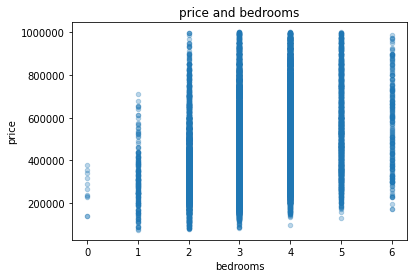

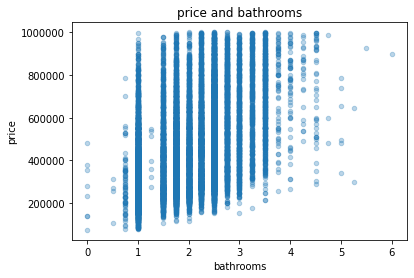

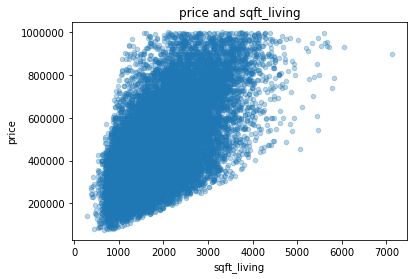

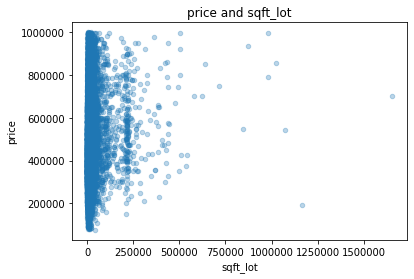

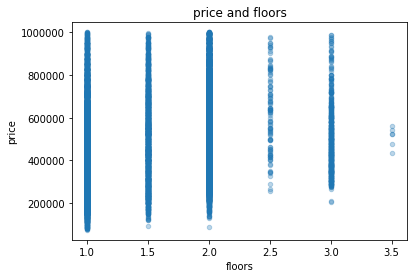

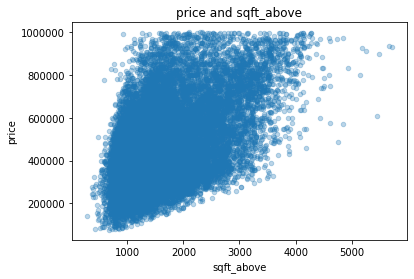

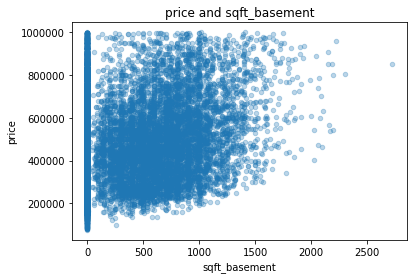

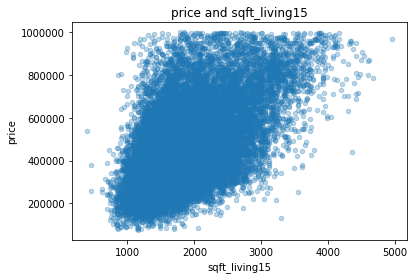

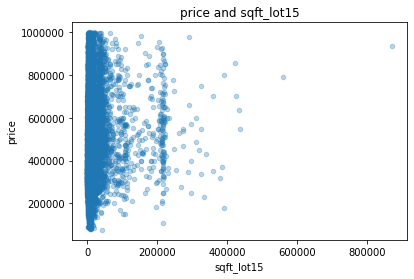

In [12]:
num_features = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'sqft_above', 'sqft_basement',
                                                  'sqft_living15', 'sqft_lot15']
for feature in num_features:
    df.plot(kind='scatter', x=feature, y='price', alpha=0.3)
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')

    plt.title("price and {}".format(feature))

**Visulaizing and pairing the categorical attributes with price**

In [13]:
categorical_vars = ['date','waterfront', 'view', 'condition', 'grade','yr_built', 'yr_renovated', 'zipcode']
temp_df = df[categorical_vars].astype('object')
temp_df[categorical_vars].describe()

,date,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode
count,20074,20074,20074,20074,20074,20074,20074,20074
unique,370,2,5,5,11,116,70,70
top,20140623T000000,0,0,3,7,2014,0,98038
freq,134,20016,18610,13041,8928,492,19346,587


**Anayzing categorical variables and feature engineering**

In [14]:
def calculate_mean_target_per_category(df, var):
    
    """
calculates the mean price per category of a categorical variable
    """
    total_houses = len(df)

    # percentage of houses per category
    temp_df = pd.Series((df[var].value_counts() / total_houses)*100).reset_index()
    temp_df.columns = [var, 'perc_houses']

    # add the mean SalePrice
    temp_df = temp_df.merge(df.groupby([var])['price'].median().reset_index(),
                            on=var,
                            how='left')
    return temp_df
def plot_categories(df, var):
    
    """
        plots percentage of the categorical variable in the left y axis against the categories 
        with the average price of the target
    """
    fig, ax = plt.subplots(figsize=(15, 4))
    plt.xticks(df.index, df[var], rotation=90)

    ax2 = ax.twinx()
    ax.bar(df.index, df["perc_houses"], color='lightgrey')
    ax2.plot(df.index, df["price"], color='blue', label='Average Sale Price')
    ax.axhline(y=5, color='red',label='5% of total house')
    ax.set_ylabel('percentage of houses per category')
    ax.set_xlabel(var)
    ax2.set_ylabel('Average Sale Price per category')
    plt.legend()
    plt.ticklabel_format(style='plain', axis='y')

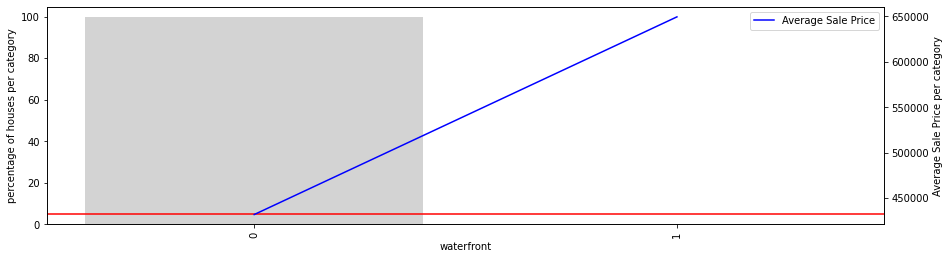

In [15]:
temp_df = calculate_mean_target_per_category(df, 'waterfront')
plot_categories(temp_df,'waterfront')

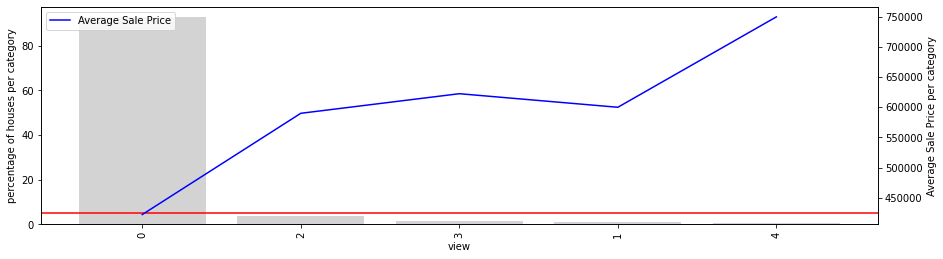

In [16]:
temp_df = calculate_mean_target_per_category(df, 'view')
plot_categories(temp_df,'view')

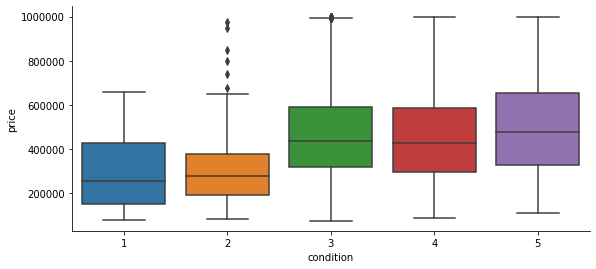

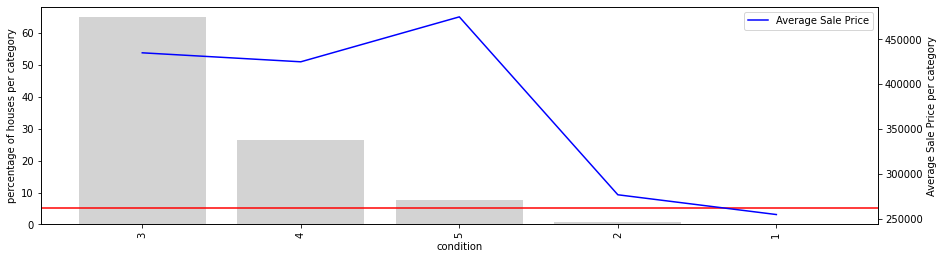

In [17]:
sns.catplot(x = 'condition', y = 'price', data = df, kind="box", height=4, aspect=2)
plt.ticklabel_format(style='plain', axis='y')
temp_df = calculate_mean_target_per_category(df, 'condition')
plot_categories(temp_df,'condition')

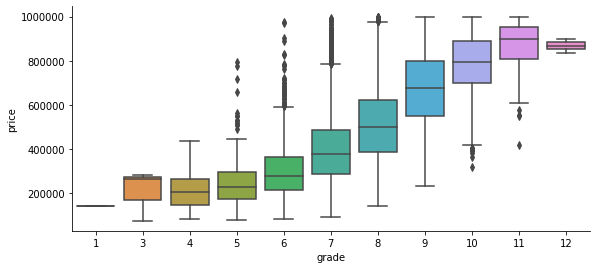

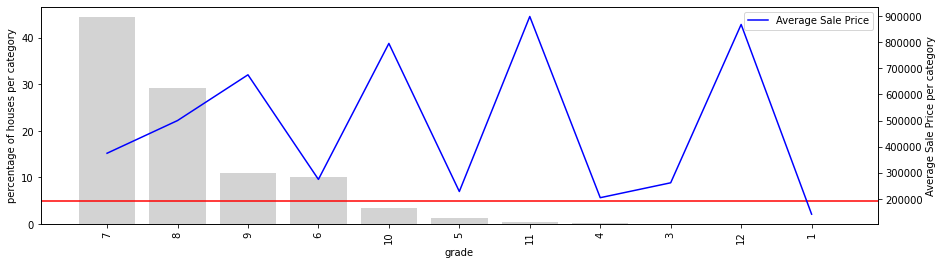

In [18]:
sns.catplot(x='grade', y='price', data=df, kind="box", height=4, aspect=2)
plt.ticklabel_format(style='plain', axis='y')
temp_df = calculate_mean_target_per_category(df, 'grade')
plot_categories(temp_df,'grade')

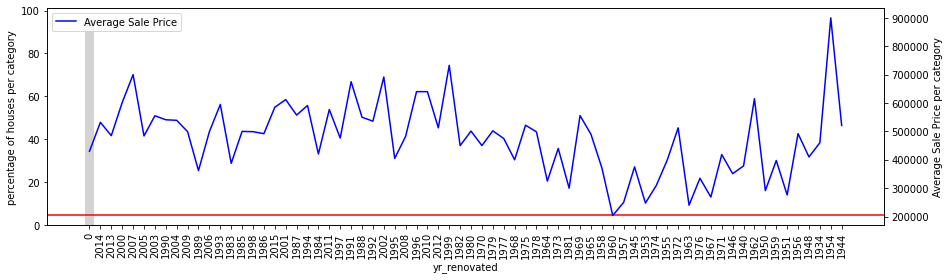

In [19]:
temp_df = calculate_mean_target_per_category(df, 'yr_renovated')
plot_categories(temp_df, 'yr_renovated')

In [20]:
df['zipcode_group'] = (df['zipcode'].astype(str).str[0:4]).astype(int)
df['zipcode_group'].nunique()

19

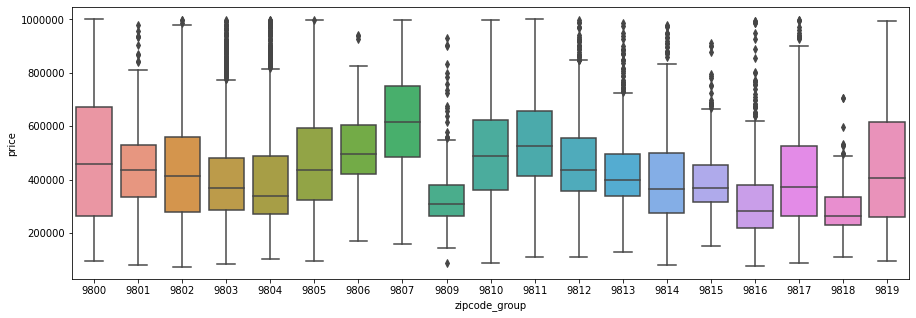

In [21]:
plt.figure(figsize=(15,5))
sns.boxplot(x='zipcode_group', y='price', data=df, )
plt.ticklabel_format(style='plain', axis='y');

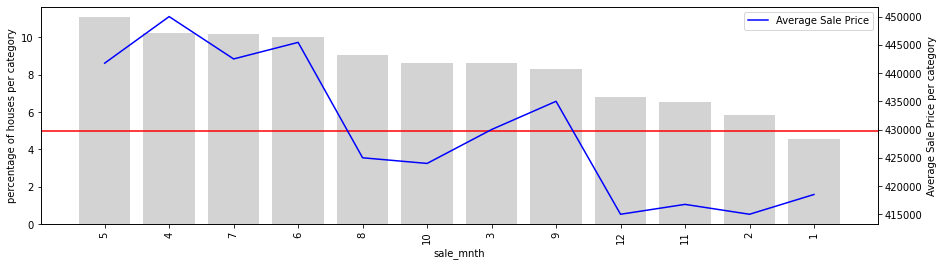

In [22]:
df['date'] = pd.to_datetime(df['date'])
df['sale_mnth'] = df['date'].dt.month
temp_df = calculate_mean_target_per_category(df, 'sale_mnth')
plot_categories(temp_df,'sale_mnth')

**Visualizing the locations of houses across few features**

In [23]:
# Function which creates a scatter plot like a map with color code
def locator(data, latitude, longitude, feature):
    
    plt.figure(figsize=(15,10))
    cmap = plt.cm.get_cmap('RdYlBu')
    sc = plt.scatter(data[longitude], data[latitude], 
                     c=data[feature], vmin=min(data[feature]), 
                     vmax=max(data[feature]), alpha=0.5,s=5, cmap=cmap)
    plt.colorbar(sc)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('{} of house by location'.format(feature), fontsize=18)
    plt.show();

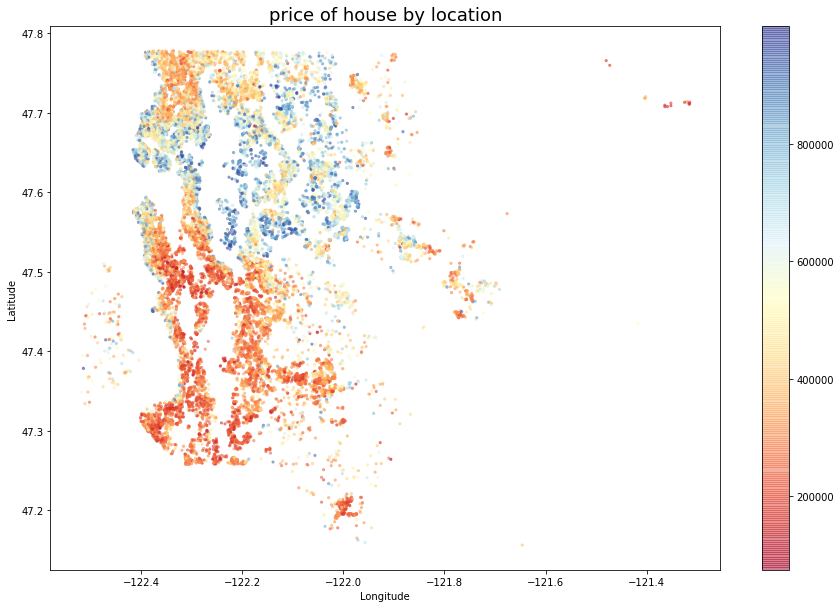

In [24]:
locator(df, 'lat', 'long', 'price')

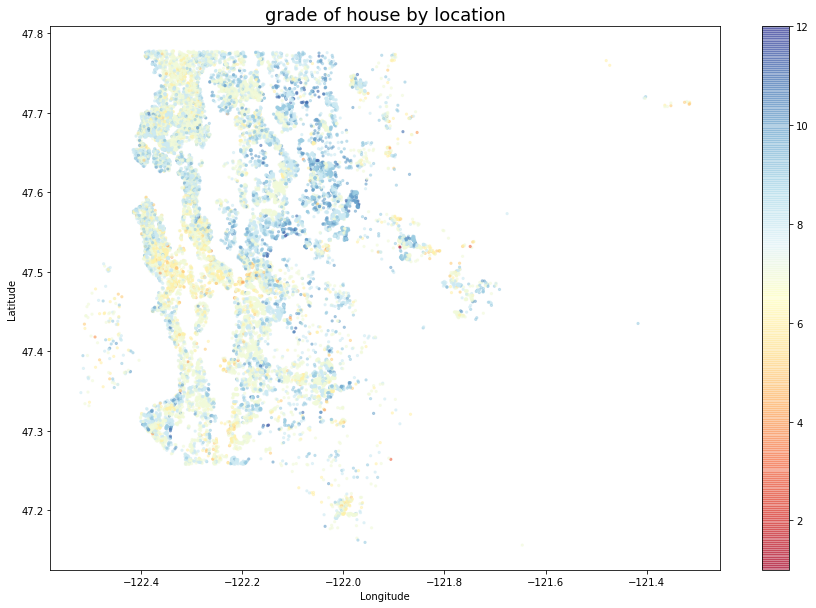

In [25]:
locator(df, 'lat', 'long', 'grade')

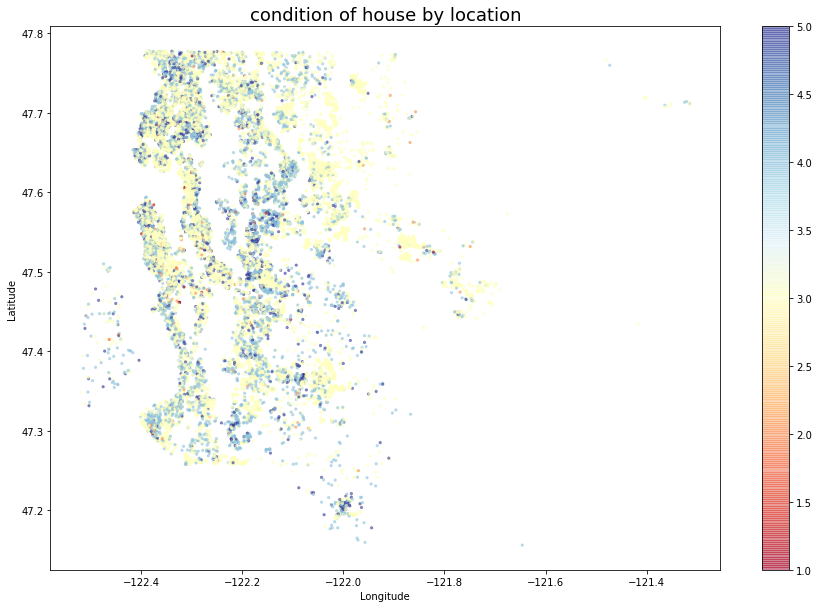

In [26]:
locator(df, 'lat', 'long', 'condition')

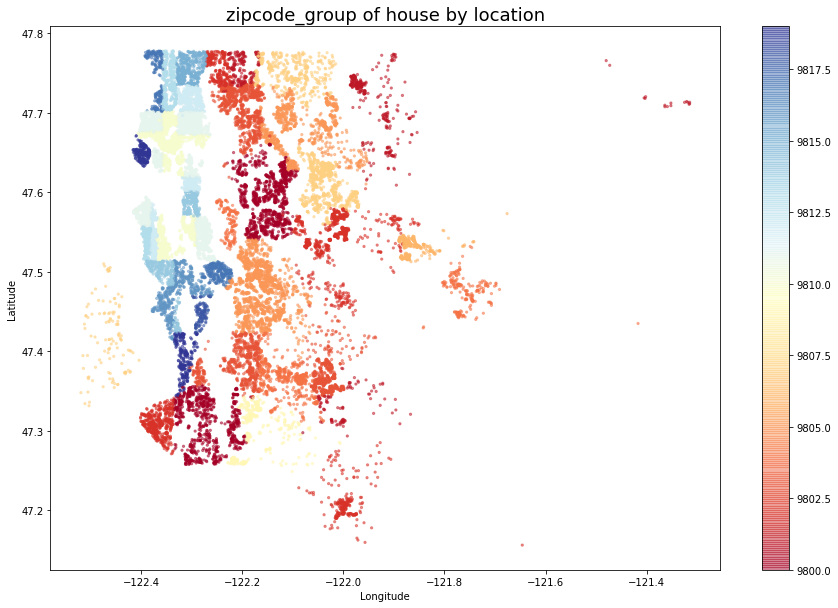

In [27]:
locator(df, 'lat', 'long', 'zipcode_group')

In [28]:
data2 = df.fillna(0)

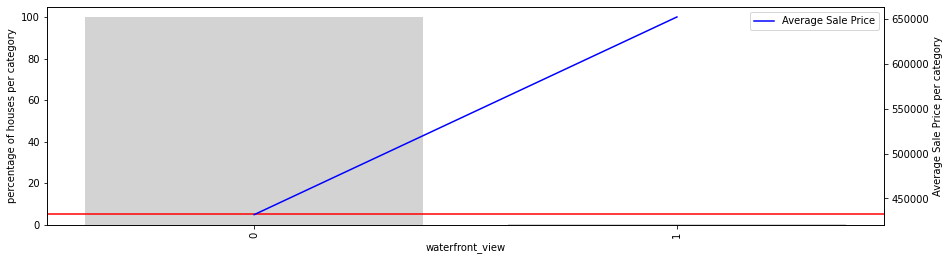

In [29]:
data2['waterfront_view'] = np.where((data2['waterfront']==1) & ((data2['view']>=1) & (data2['view']>=4)),1,0);

temp_df = calculate_mean_target_per_category(data2, 'waterfront_view')
plot_categories(temp_df,'waterfront_view')

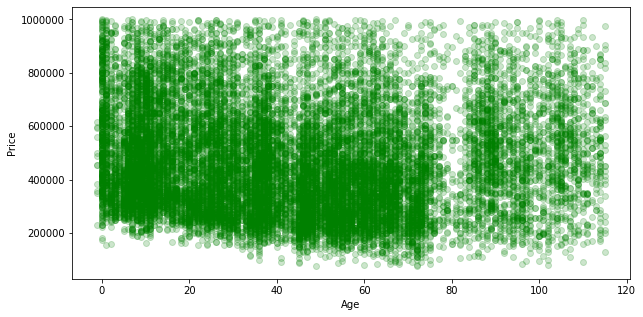

In [30]:
data2['sale_yr'] = data2['date'].dt.year
data2['age'] = data2['sale_yr'] - data2['yr_built']
plt.figure(figsize=(10, 5))
plt.scatter(x='age', y='price', data=data2, alpha=0.2, c='green')
plt.xlabel("Age")
plt.ylabel("Price")
plt.ticklabel_format(style='plain', axis='y')

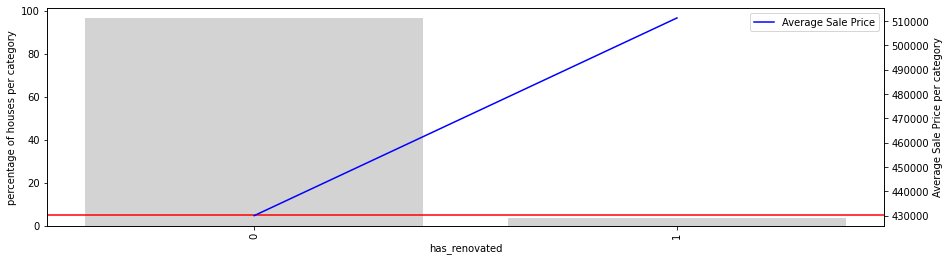

In [31]:
data2['has_renovated'] = np.where(data2['yr_renovated']==0,0,1)
temp_df = calculate_mean_target_per_category(data2, 'has_renovated')
plot_categories(temp_df,'has_renovated')

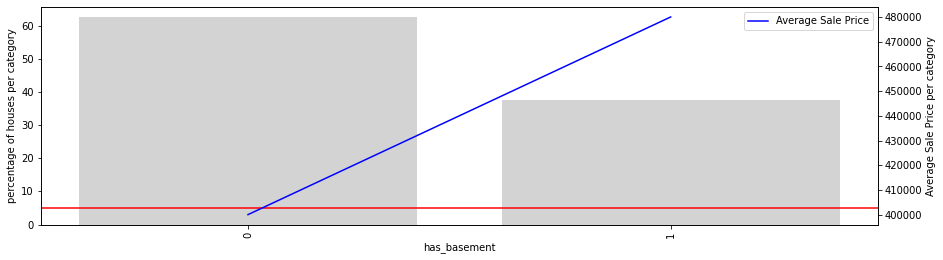

In [32]:
data2['has_basement'] = np.where(data2['sqft_basement']==0,0,1)
temp_df = calculate_mean_target_per_category(data2, 'has_basement')
plot_categories(temp_df,'has_basement')

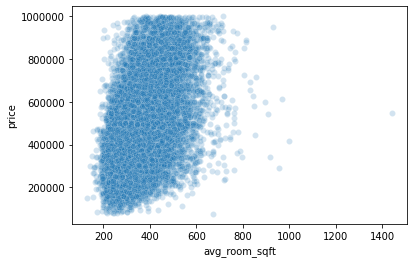

In [33]:
data2['avg_room_sqft'] = data2['sqft_living'] / (data2['bedrooms'] + data2['bathrooms'])
sns.scatterplot(x='avg_room_sqft',y='price',data=data2,alpha=0.2)
plt.ticklabel_format(style='plain', axis='y')

In [34]:
drop_var = ['yr_built', 'yr_renovated', 'zipcode', 'sale_yr']
data3 = data2.drop(drop_var,axis=1)

In [35]:
#@title Default title text
dummy_var=['zipcode_group', 'sale_mnth']
data4 = pd.get_dummies(data=data3, columns=dummy_var, drop_first=True)
data4.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sale_mnth_3,sale_mnth_4,sale_mnth_5,sale_mnth_6,sale_mnth_7,sale_mnth_8,sale_mnth_9,sale_mnth_10,sale_mnth_11,sale_mnth_12
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


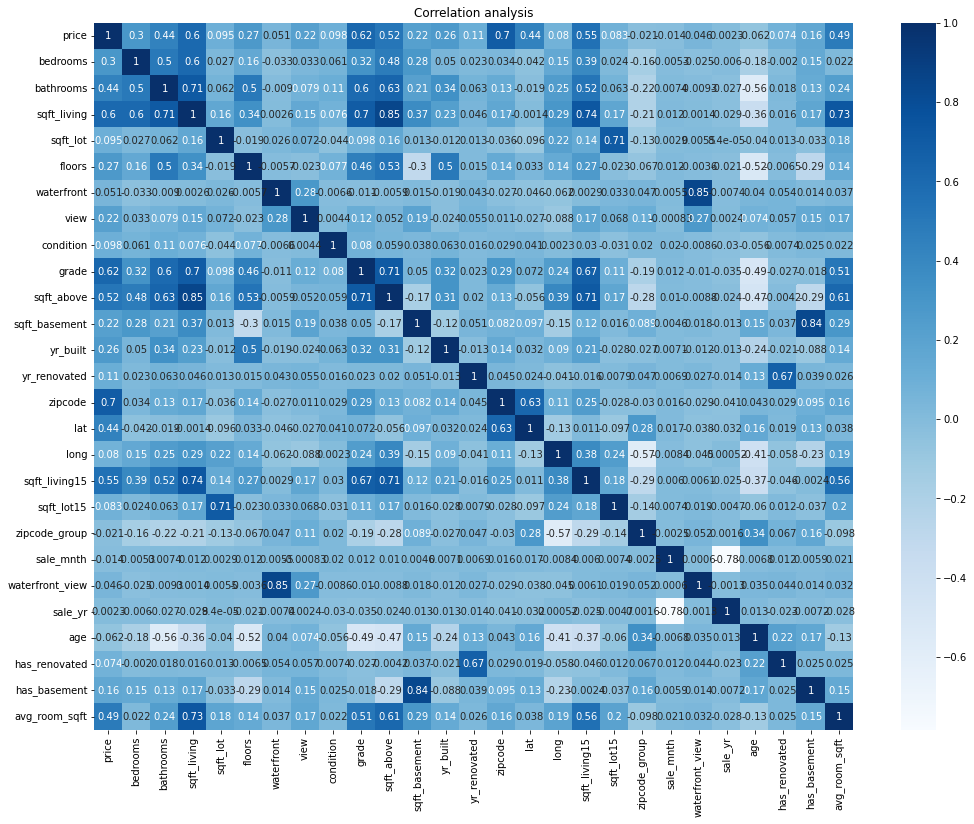

In [36]:
categorical_vars = ['waterfront', 'view', 'condition', 'grade', 'waterfront_view',
                  'yr_built','yr_renovated','zipcode','sale_yr','has_renovated', 'has_basement']
data_corr = data2[:]
for cat in categorical_vars:
    means = data_corr.groupby(cat)['price'].mean()
    data_corr[cat] = data_corr[cat].map(means)
fig = plt.figure(figsize=(17, 13))
features=data_corr.iloc[:,2:].columns
sns.heatmap(data_corr[features].corr(), cmap='Blues',annot=True)
plt.xticks(rotation=90)
plt.title('Correlation analysis')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
# from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [38]:
zipcode_median_price = data3.groupby('zipcode_group')['price'].median()
zipcode_median_price_dict = zipcode_median_price.to_dict()
data4['zip_median_price'] = data3['zipcode_group'].map(zipcode_median_price_dict)
drop_vars2 = ['id', 'date','price','zip_median_price']
features = data4.drop(drop_vars2,axis=1)
target = data4[['price','zip_median_price']]
X_train, X_validation, y_train, y_validation = train_test_split(features,target, test_size=0.30, random_state=42, shuffle = True)
y_validation2 = y_validation['price']
y_pred = y_validation['zip_median_price']
print("MAE for the baseline model tested on test set: ", mean_absolute_error(y_validation2, y_pred))
print("MSE for the baseline model tested on test set: ", mean_squared_error(y_validation2, y_pred))

MAE for the baseline model tested on test set:  144178.1337373402
MSE for the baseline model tested on test set:  34449518772.01614


In [39]:
drop_vars3 = ['zip_median_price']
data5 = data4.drop(drop_vars3,axis=1)

In [40]:
feature = data5.iloc[:,3:]              
target = data5['price']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [41]:
X_train = X_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X_test = X_test.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [42]:
val_X = X_test
train_X = X_train

In [43]:
# The number of observations and columns in the train and validation datasets
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

X_train:  (14051, 49)
X_test:  (6023, 49)
y_train:  (14051,)
y_test:  (6023,)


In [44]:
scaler = StandardScaler()
X_train  = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
linreg_pred = linreg.predict(X_test)

In [46]:
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_mse = mean_squared_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
print("MAE of the linear regression model is:", linreg_mae)
print("MSE of the linear regression model is:", linreg_mse)
print("R2 score of the linear regression model is:", linreg_r2)

MAE of the linear regression model is: 75716.52303966355
MSE of the linear regression model is: 9777048134.24743
R2 score of the linear regression model is: 0.7366915994752837


In [47]:
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

In [48]:
dtree_mae = mean_absolute_error(y_test, dtree_pred)
dtree_mse = mean_squared_error(y_test, dtree_pred)
dtree_r2 = r2_score(y_test, dtree_pred)
print("MAE of the decision tree model is:", dtree_mae)
print("MSE of the decision tree model is:", dtree_mse)
print("R2 score of the decision tree model is:", dtree_r2)

MAE of the decision tree model is: 75882.17765233273
MSE of the decision tree model is: 11596040854.466877
R2 score of the decision tree model is: 0.6877038009955587


In [ ]:
rforest = RandomForestRegressor()
rforest.fit(X_train, y_train)
rforest_pred = rforest.predict(X_test)

In [ ]:
rforest_mae = mean_absolute_error(y_test, rforest_pred)
rforest_mse = mean_squared_error(y_test, rforest_pred)
rforest_r2 = r2_score(y_test, rforest_pred)
print("MAE of the random forest model is:", rforest_mae)
print("MSE of the random forest model is:", rforest_mse)
print("R2 score of the random forest model is:", rforest_r2)

In [ ]:
y_test.head(10)

In [ ]:
plt.figure(figsize=(20, 17))
plt.scatter(rforest_pred,y_test,alpha=.7)
plt.xlabel("Predicted House Price")
plt.ylabel("Actual House Price")
p1 = max(max(rforest_pred), max(y_test))
p2 = min(min(rforest_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r-')
# plt.xlim([200000, 500000])
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')